# Bank Marketing Project

This project implements an end-to-end MLOps pipeline for the Bank Marketing Dataset from the UCI Machine Learning Repository. The objective is to predict whether a customer will subscribe to a term deposit (y = yes/no) based on their demographic details, previous interactions, and economic indicators.

This project follows MLOps best practices, covering data versioning, model experimentation, deployment, monitoring, and CI/CD.

Dataset: The dataset contains customer information and marketing campaign data from a bank. The goal is to predict whether a customer subscribes to a term deposit (`y` variable). 

# Step 1: Dataset Selection

### Tasks Covered in this Step:
1. Load the dataset
2. Explore dataset structure
3. Check for missing values
4. Check for duplicate entries
5. Summarize numerical features

### 1. Import Required Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

### 2. Load the Dataset

In [4]:
# Load the dataset (CSV file)
file_path = "bank-additional-full.csv"
df = pd.read_csv(file_path, delimiter=';')

# Display first 5 rows to understand the data
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### 3. Get Basic Info about Dataset

In [5]:
# Display dataset info (column names, non-null counts, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 4. Check for Missing Values

In [6]:
# Check for missing values in each column
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 5. Check for Duplicate Rows

In [7]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

Total Duplicate Rows: 12


### 6. Summary Statistics for Numerical Features

In [8]:
# Display statistical summary of numerical columns
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

# Step 2: Dataset Schema & Parquet Conversion

### Objectives:
1. Define the schema for our dataset.
2. Convert the dataset in Parquet format.

### 1. Define Dataset Schema

In [9]:
# Define dataset schema
dataset_schema = {
    "age": {"type": "numerical", "nullable": False},
    "job": {"type": "categorical", "allowed_values": list(df["job"].unique()), "nullable": False},
    "marital": {"type": "categorical", "allowed_values": list(df["marital"].unique()), "nullable": False},
    "education": {"type": "categorical", "allowed_values": list(df["education"].unique()), "nullable": False},
    "default": {"type": "categorical", "allowed_values": list(df["default"].unique()), "nullable": False},
    "housing": {"type": "categorical", "allowed_values": list(df["housing"].unique()), "nullable": False},
    "loan": {"type": "categorical", "allowed_values": list(df["loan"].unique()), "nullable": False},
    "contact": {"type": "categorical", "allowed_values": list(df["contact"].unique()), "nullable": False},
    "month": {"type": "categorical", "allowed_values": list(df["month"].unique()), "nullable": False},
    "day_of_week": {"type": "categorical", "allowed_values": list(df["day_of_week"].unique()), "nullable": False},
    "duration": {"type": "numerical", "nullable": False},
    "campaign": {"type": "numerical", "nullable": False},
    "pdays": {"type": "numerical", "nullable": False},
    "previous": {"type": "numerical", "nullable": False},
    "poutcome": {"type": "categorical", "allowed_values": list(df["poutcome"].unique()), "nullable": False},
    "emp.var.rate": {"type": "numerical", "nullable": False},
    "cons.price.idx": {"type": "numerical", "nullable": False},
    "cons.conf.idx": {"type": "numerical", "nullable": False},
    "euribor3m": {"type": "numerical", "nullable": False},
    "nr.employed": {"type": "numerical", "nullable": False},
    "y": {"type": "categorical", "allowed_values": list(df["y"].unique()), "nullable": False}  # Target variable
}

# Display schema
dataset_schema


{'age': {'type': 'numerical', 'nullable': False},
 'job': {'type': 'categorical',
  'allowed_values': ['housemaid',
   'services',
   'admin.',
   'blue-collar',
   'technician',
   'retired',
   'management',
   'unemployed',
   'self-employed',
   'unknown',
   'entrepreneur',
   'student'],
  'nullable': False},
 'marital': {'type': 'categorical',
  'allowed_values': ['married', 'single', 'divorced', 'unknown'],
  'nullable': False},
 'education': {'type': 'categorical',
  'allowed_values': ['basic.4y',
   'high.school',
   'basic.6y',
   'basic.9y',
   'professional.course',
   'unknown',
   'university.degree',
   'illiterate'],
  'nullable': False},
 'default': {'type': 'categorical',
  'allowed_values': ['no', 'unknown', 'yes'],
  'nullable': False},
 'housing': {'type': 'categorical',
  'allowed_values': ['no', 'yes', 'unknown'],
  'nullable': False},
 'loan': {'type': 'categorical',
  'allowed_values': ['no', 'yes', 'unknown'],
  'nullable': False},
 'contact': {'type': 'categ

### 2. Convert Dataset to Parquet Format

In [10]:
# Save dataset as a Parquet file
parquet_file_path = "bank-additional-full.parquet"
df.to_parquet(parquet_file_path, engine="pyarrow", index=False)

print(f"Dataset successfully saved as Parquet at: {parquet_file_path}")

Dataset successfully saved as Parquet at: bank-additional-full.parquet


### 3. Verify Parquet File by Reading It

In [11]:
# Load the Parquet file to verify
df_parquet = pd.read_parquet(parquet_file_path)

# Display first few rows
df_parquet.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# Step 3: Dataset Profiling

### Objectives:
1. Generate an automatic profiling report.
2. Identify potential data issues (missing values, outliers, distributions).
3. Save the profiling report for future reference.

### 1. Install ydata-profiling

In [17]:
# Install profiling library
!pip install --upgrade numpy
!pip install --upgrade ydata-profiling

  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.3 which is incompatible.
ydata-profiling 4.14.0 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.3 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2. Generate the Profiling Report

In [12]:
# Import profiling tool
from ydata_profiling import ProfileReport

# Generate profiling report
profile = ProfileReport(df, explorative=True)

# Save the report as an HTML file
profiling_report_path = "profiling_report.html"
profile.to_file(profiling_report_path)

print(f"Profiling report saved at: {profiling_report_path}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved at: profiling_report.html


### 3. Display the Report

In [13]:
# Display profiling report inside Jupyter Notebook
profile.to_notebook_iframe()

# Step 4: Train-Test-Production Split

### Objectives:
1. Split the dataset into Training (60%), Test (20%), and Production (20%) sets.
2. Ensure the split is reproducible using a random seed.
3. Save all three splits in Parquet format.

### 1. Import Required Libraries

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

### 2. Perform Train-Test-Production Split

In [15]:
# Set a random seed for reproducibility
random_seed = 42

# First, split into Train (60%) and Temp (40%) (Test + Production)
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=random_seed, stratify=df['y'])

# Now, split Temp into Test (20%) and Production (20%)
test_data, prod_data = train_test_split(temp_data, test_size=0.5, random_state=random_seed, stratify=temp_data['y'])

# Display split sizes
print(f"Train Data: {train_data.shape}")
print(f"Test Data: {test_data.shape}")
print(f"Production Data: {prod_data.shape}")

Train Data: (24712, 21)
Test Data: (8238, 21)
Production Data: (8238, 21)


### 3. Save Train-Test-Production Sets as Parquet

In [16]:
# Define file paths
train_path = "train.parquet"
test_path = "test.parquet"
prod_path = "prod.parquet"

# Save to Parquet format
train_data.to_parquet(train_path, engine="pyarrow", index=False)
test_data.to_parquet(test_path, engine="pyarrow", index=False)
prod_data.to_parquet(prod_path, engine="pyarrow", index=False)

print(f"Datasets successfully saved:\nTrain: {train_path}\nTest: {test_path}\nProduction: {prod_path}")


Datasets successfully saved:
Train: train.parquet
Test: test.parquet
Production: prod.parquet


### 4. Verify by Reloading Parquet Files

In [17]:
# Load back the Parquet files to verify
train_loaded = pd.read_parquet(train_path)
test_loaded = pd.read_parquet(test_path)
prod_loaded = pd.read_parquet(prod_path)

# Display the first few rows of Train set
train_loaded.head()

age          job   marital          education  default housing loan  \
0   35       admin.   married  university.degree  unknown     yes   no   
1   42      unknown  divorced        high.school       no      no   no   
2   45  blue-collar   married           basic.9y  unknown     yes  yes   
3   27       admin.    single        high.school       no      no   no   
4   51       admin.   married  university.degree       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         wed  ...         2    999         0  nonexistent   
1  telephone   may         thu  ...         2    999         0  nonexistent   
2  telephone   may         wed  ...         1    999         0  nonexistent   
3   cellular   jul         tue  ...         1    999         0  nonexistent   
4   cellular   jul         fri  ...         5    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
0          1.1          93.994          -36.4      4.858       5191.0   no  
1          1.1          93.994          -36.4      4.860       5191.0   no  
2          1.1          93.994          -36.4      4.856       5191.0   no  
3          1.4          93.918          -42.7      4.962       5228.1   no  
4         -2.9          92.469          -33.6      0.921       5076.2  yes  

[5 rows x 21 columns]

# Step 5: Data Version Control

### Objectives:
1. Create a GitHub repository and organize dataset files.
2. Ensure all dataset-related files are stored inside the `datasets/` directory.
3. Push the dataset files to GitHub for version control.

### Files to be Pushed:
- **Original Dataset:** `bank-additional-full.csv`
- **Train Dataset:** `train.parquet`
- **Test Dataset:** `test.parquet`
- **Production Dataset:** `prod.parquet`
- **Profiling Report:** `profiling_report.html`

### 1. Create a datasets/ Folder and Move Files

In [18]:
import os
import shutil

# Define dataset folder
datasets_path = "datasets"

# Ensure datasets directory exists
os.makedirs(datasets_path, exist_ok=True)

# Move dataset files into datasets/ directory
files_to_move = ["bank-additional-full.csv", "train.parquet", "test.parquet", "prod.parquet", "profiling_report.html"]

for file in files_to_move:
    if os.path.exists(file):
        shutil.move(file, os.path.join(datasets_path, file))

print("All dataset files have been moved to the datasets/ folder.")


All dataset files have been moved to the datasets/ folder.


### 2. Initialize Git Locally

In [25]:
# Initialize Git
!git init

Initialized empty Git repository in C:/Users/PC/Documents/MLOps/Bank_Marketing_Project/.git/


### 3. Rename master Branch to main

In [30]:
!git branch -M main

### 4. Link Local Repository to GitHub

In [31]:
# Link GitHub repository to local project
!git remote add origin https://github.com/riasingh-13/Bank_Marketing_Project.git

error: remote origin already exists.


### 5. Ensure All Dataset-Related Files Exist

In [27]:
# Check if all dataset-related files exist
files = ["datasets/bank-additional-full.csv", "datasets/train.parquet", "datasets/test.parquet", "datasets/prod.parquet", "datasets/profiling_report.html"]

missing_files = [f for f in files if not os.path.exists(f)]

if missing_files:
    print("Missing files:", missing_files)
else:
    print("All dataset files are present in the datasets/ folder.")


All dataset files are present in the datasets/ folder.


### 6. Stage & Commit All Files

In [32]:
# Stage all files
!git add .

# Commit changes with a meaningful message
!git commit -m "Added dataset files and profiling report inside datasets/ folder"

[main 7e31b8b] Added dataset files and profiling report inside datasets/ folder
 1 file changed, 62 insertions(+), 3 deletions(-)


### 7. Push the main Branch to GitHub

In [33]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/riasingh-13/Bank_Marketing_Project.git
 * [new branch]      main -> main


# Step 6: ML Pipeline with Scikit-Learn

### Objectives:
1. Load the dataset directly from GitHub using the raw file link.
2. Build a full ML pipeline including:
   - Scaling numerical features
   - Encoding categorical features
   - Handling missing values (Imputation)
3. Train a simple model using the processed data.

### 1. Load the Dataset from GitHub

In [19]:
# Define GitHub raw file link
github_url = "https://raw.githubusercontent.com/riasingh-13/Bank_Marketing_Project/main/datasets/train.parquet"

# Load the dataset from GitHub
df_train = pd.read_parquet(github_url, engine="pyarrow")

# Display first few rows
df_train.head()

age          job   marital          education  default housing loan  \
0   35       admin.   married  university.degree  unknown     yes   no   
1   42      unknown  divorced        high.school       no      no   no   
2   45  blue-collar   married           basic.9y  unknown     yes  yes   
3   27       admin.    single        high.school       no      no   no   
4   51       admin.   married  university.degree       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         wed  ...         2    999         0  nonexistent   
1  telephone   may         thu  ...         2    999         0  nonexistent   
2  telephone   may         wed  ...         1    999         0  nonexistent   
3   cellular   jul         tue  ...         1    999         0  nonexistent   
4   cellular   jul         fri  ...         5    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
0          1.1          93.994          -36.4      4.858       5191.0   no  
1          1.1          93.994          -36.4      4.860       5191.0   no  
2          1.1          93.994          -36.4      4.856       5191.0   no  
3          1.4          93.918          -42.7      4.962       5228.1   no  
4         -2.9          92.469          -33.6      0.921       5076.2  yes  

[5 rows x 21 columns]

### 2. Define Feature Types (Numerical & Categorical)

In [20]:
# Identify numerical and categorical columns
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()

# Remove target column from feature lists
categorical_features.remove("y")  # Target variable

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### 3. Check for Missing Values in Numerical & Categorical Features

In [21]:
# Check missing values in numerical features
print("Missing Values in Numerical Features:")
print(df_train[numerical_features].isnull().sum())

# Check missing values in categorical features
print("\nMissing Values in Categorical Features:")
print(df_train[categorical_features].isnull().sum())

Missing Values in Numerical Features:
age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

Missing Values in Categorical Features:
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64


### 4. Analyze Distribution of Numerical Features

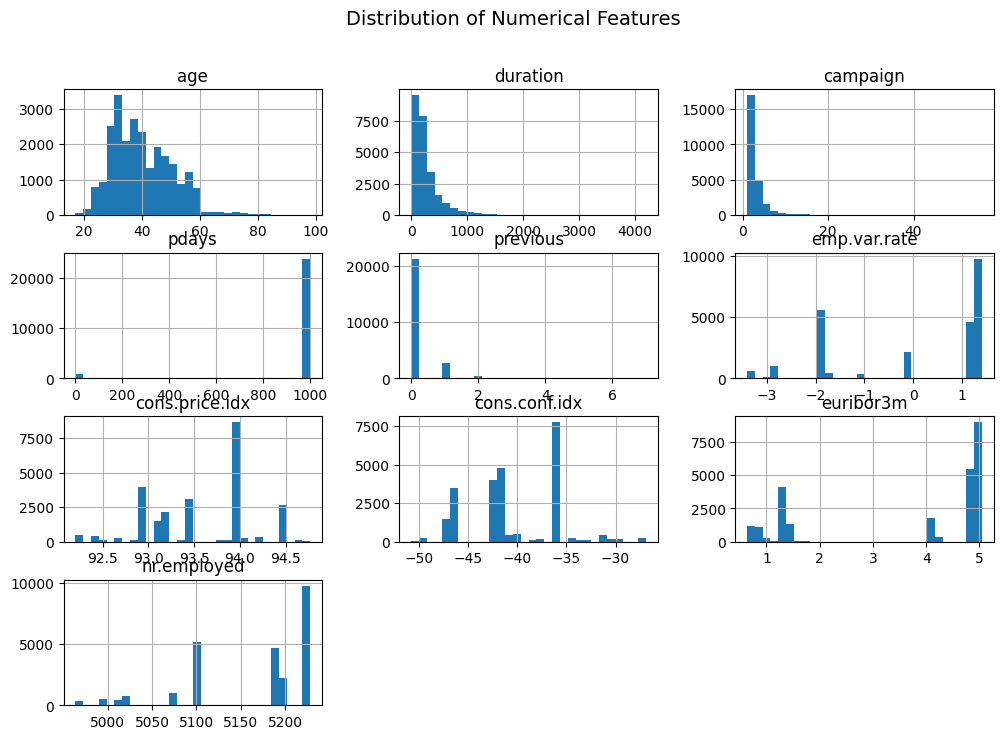

In [22]:
import matplotlib.pyplot as plt

# Ensure Matplotlib runs in an interactive mode
%matplotlib inline

# Plot histograms for numerical features
df_train[numerical_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

### 5. Analyze Frequency of Categorical Features

In [23]:
# Print frequency counts for categorical features
for col in categorical_features:
    print(f"\nValue counts for {col}:")
    print(df_train[col].value_counts())


Value counts for job:
job
admin.           6293
blue-collar      5491
technician       4061
services         2413
management       1785
retired          1025
entrepreneur      855
self-employed     832
housemaid         626
unemployed        598
student           531
unknown           202
Name: count, dtype: int64

Value counts for marital:
marital
married     14972
single       6990
divorced     2702
unknown        48
Name: count, dtype: int64

Value counts for education:
education
university.degree      7307
high.school            5768
basic.9y               3607
professional.course    3130
basic.4y               2467
basic.6y               1359
unknown                1062
illiterate               12
Name: count, dtype: int64

Value counts for default:
default
no         19500
unknown     5210
yes            2
Name: count, dtype: int64

Value counts for housing:
housing
yes        12933
no         11165
unknown      614
Name: count, dtype: int64

Value counts for loan:
loan
no      

### 6. Build a Scikit-Learn ML Pipeline & Implement the Best Imputation Strategies

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Choose best strategy based on missing value analysis
numerical_impute_strategy = "median"  # Use "mean" if data is normally distributed
categorical_impute_strategy = "constant"  # Use "most_frequent" if categories are balanced

# Define Preprocessing Steps
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy=numerical_impute_strategy)),  # Handle missing values
    ("scaler", StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy=categorical_impute_strategy, fill_value="Unknown")),  # Handle missing values
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

print("Best imputation strategies applied.")

# Display pipeline structure
preprocessor


Best imputation strategies applied.


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'duration', 'campaign', 'pdays',
                                  'previous', 'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'day_of_week', 'poutcome'])])

### 7. Implement a Basic ML Model (Logistic Regression)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define target variable
X = df_train.drop(columns=["y"])  # Features
y = df_train["y"].map({"no": 0, "yes": 1})  # Convert target to binary (0/1)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create full pipeline with model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred = model_pipeline.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9146


# Step 7: ML Experimentation & Tracking with Weights & Biases (W&B)

### Objectives:
1. Run at least 9 ML experiments with different:
   - ML algorithms (Logistic Regression, Decision Trees, Random Forest)
   - Hyperparameter tuning strategies (max depth, regularization, etc.)
   - Data transformations (encoding, scaling variations)
2. Evaluate the models using **k-fold cross-validation**.
3. Evaluate the best model against the test set.
4. Use **W&B to track, log, and save models**.


### 1. Install & Login to W&B

In [44]:
# Install W&B
!pip install wandb

  Using cached wandb-0.19.8-py3-none-win_amd64.whl.metadata (10 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached sentry_sdk-2.22.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached setproctitle-1.3.5-cp312-cp312-win_amd64.whl.metadata (10 kB)
Using cached wandb-0.19.8-py3-none-win_amd64.whl (20.2 MB)
Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
Using cached sentry_sdk-2.22.0-py2.py3-none-any.whl (325 kB)
Using cached setproctitle-1.3.5-cp312-cp312-win_amd64.whl (12 kB)


In [26]:
import wandb

# Login to Weights & Biases (you may need to create an account)
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: riasingh1309 (riasingh1309-jio-institute) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

### 2. Read Train & Test Data from GitHub

In [27]:
# Define GitHub raw file links
train_url = "https://raw.githubusercontent.com/riasingh-13/Bank_Marketing_Project/main/datasets/train.parquet"
test_url = "https://raw.githubusercontent.com/riasingh-13/Bank_Marketing_Project/main/datasets/test.parquet"

# Load train and test datasets
df_train = pd.read_parquet(train_url, engine="pyarrow")
df_test = pd.read_parquet(test_url, engine="pyarrow")

# Display dataset info
df_train.head()


age          job   marital          education  default housing loan  \
0   35       admin.   married  university.degree  unknown     yes   no   
1   42      unknown  divorced        high.school       no      no   no   
2   45  blue-collar   married           basic.9y  unknown     yes  yes   
3   27       admin.    single        high.school       no      no   no   
4   51       admin.   married  university.degree       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         wed  ...         2    999         0  nonexistent   
1  telephone   may         thu  ...         2    999         0  nonexistent   
2  telephone   may         wed  ...         1    999         0  nonexistent   
3   cellular   jul         tue  ...         1    999         0  nonexistent   
4   cellular   jul         fri  ...         5    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
0          1.1          93.994          -36.4      4.858       5191.0   no  
1          1.1          93.994          -36.4      4.860       5191.0   no  
2          1.1          93.994          -36.4      4.856       5191.0   no  
3          1.4          93.918          -42.7      4.962       5228.1   no  
4         -2.9          92.469          -33.6      0.921       5076.2  yes  

[5 rows x 21 columns]

In [28]:
# Identify feature types dynamically
numerical_features = df_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df_train.select_dtypes(include=["object"]).columns.tolist()

# Ensure 'y' is NOT in feature lists
if "y" in numerical_features:
    numerical_features.remove("y")
if "y" in categorical_features:
    categorical_features.remove("y")

print(f"\n✅ Numerical Features: {numerical_features}")
print(f"✅ Categorical Features: {categorical_features}")



✅ Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
✅ Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### 3. Define ML Experimentation Setup

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Define transformations
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Define ML algorithms
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Define hyperparameter variations
hyperparameters = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Decision Tree": {"max_depth": [3, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200]}
}

# Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Experiment setup complete.")

Experiment setup complete.


### 4. Run ML Experiments & Track with W&B

In [30]:
# Initialize W&B project
wandb.init(project="Bank_Marketing_MLOps", name="model-experimentation")

results = []

# Iterate through different ML models
for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        for param_name, param_values in hyperparameters[model_name].items():
            for value in param_values:
                
                # Define preprocessing steps
                numerical_transformer = Pipeline(steps=[
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", scaler)
                ])

                categorical_transformer = Pipeline(steps=[
                    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
                    ("encoder", OneHotEncoder(handle_unknown="ignore"))
                ])

                # Ensure proper feature selection before running pipeline
                preprocessor = ColumnTransformer(transformers=[
                    ("num", numerical_transformer, numerical_features),
                    ("cat", categorical_transformer, categorical_features)
                ])

                # Define pipeline
                model_pipeline = Pipeline(steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", model.set_params(**{param_name: value}))
                ])

                # Ensure 'y' exists before using it
                if "y" not in df_train.columns:
                    raise KeyError("❌ Target column 'y' is missing in df_train!")

                # Define X and y properly
                X = df_train.drop(columns=["y"], errors="ignore")
                y = df_train["y"].map({"no": 0, "yes": 1})  # Convert categorical target to numerical
                
                # Check data integrity
                print(f"\n✅ X shape: {X.shape}, y shape: {y.shape}")
                print(f"✅ Unique values in y: {y.unique()}")

                # Perform cross-validation (AFTER FIXING FEATURE SELECTION)
                scores = cross_val_score(model_pipeline, X, y, cv=cv_strategy, scoring="accuracy")
                
                mean_score = scores.mean()
                print(f"Cross-Validation Mean Accuracy: {mean_score:.4f}")

                # Log experiment details to W&B
                wandb.log({
                    "Model": model_name,
                    "Scaler": scaler_name,
                    "Hyperparameter": param_name,
                    "Value": value,
                    "Mean Accuracy": mean_score
                })

                results.append((model_name, scaler_name, param_name, value, mean_score))

wandb.finish()



✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9113

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9106

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9108

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9041

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9094

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9104

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]


C:\Users\PC\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

Cross-Validation Mean Accuracy: 0.9110

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]


C:\Users\PC\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

Cross-Validation Mean Accuracy: 0.9107

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]


C:\Users\PC\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

Cross-Validation Mean Accuracy: 0.9109

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9067

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9113

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9039

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9067

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9112

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9037

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9067

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Validation Mean Accuracy: 0.9113

✅ X shape: (24712, 20), y shape: (24712,)
✅ Unique values in y: [0 1]
Cross-Vali

### 5. Save & Upload Best Model to W&B After Model Evaluation on Test Set

In [33]:
import joblib
import shutil
import os

# Get best model from results (highest mean accuracy)
best_model = max(results, key=lambda x: x[-1])
best_model_name, best_scaler, best_param, best_value, best_score = best_model

print(f"\n🏆 Best Model Selected: {best_model_name}")
print(f"   📌 Best Scaler: {best_scaler}")
print(f"   📌 Best Hyperparameter: {best_param} = {best_value}")
print(f"   ✅ Best Mean Accuracy (CV): {best_score:.4f}")

# Reinitialize W&B for Test Set Evaluation
wandb.init(project="Bank_Marketing_MLOps", name="test-set-evaluation")

# Retrain best model on full training set
final_model = models[best_model_name].set_params(**{best_param: best_value})

# Ensure feature selection is consistent
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

# Create final pipeline
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", final_model)
])

# Train final model on full training data
final_pipeline.fit(X, y)

# Load test dataset
test_url = "https://raw.githubusercontent.com/riasingh-13/Bank_Marketing_Project/main/datasets/test.parquet"
df_test = pd.read_parquet(test_url, engine="pyarrow")

# Define X_test and y_test
X_test = df_test.drop(columns=["y"], errors="ignore")
y_test = df_test["y"].map({"no": 0, "yes": 1})  # Convert categorical target to numerical

# Make predictions on test data
y_pred_test = final_pipeline.predict(X_test)

# Compute final evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print test evaluation results
print("\n📊 Test Set Evaluation Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Log test evaluation metrics to W&B
wandb.log({
    "Test Accuracy": accuracy,
    "Test Precision": precision,
    "Test Recall": recall,
    "Test F1 Score": f1
})

# Define model save path in a separate directory to avoid permission issues
wandb_model_path = os.path.join(os.getcwd(), "wandb_models")
os.makedirs(wandb_model_path, exist_ok=True)  # Create directory if it doesn't exist

# Save the best trained model
local_model_path = "best_model.pkl"
joblib.dump(final_pipeline, local_model_path)

# Manually move the model to the W&B directory
wandb_save_path = os.path.join(wandb_model_path, "best_model.pkl")
shutil.copy(local_model_path, wandb_save_path)

# Use W&B Artifacts to save the model instead of `wandb.save()`
artifact = wandb.Artifact(name="best_model", type="model")
artifact.add_file(wandb_save_path)
wandb.log_artifact(artifact)
wandb.finish()

print(f"\n✅ Final model evaluated and saved at: {wandb_save_path}")



🏆 Best Model Selected: Logistic Regression
   📌 Best Scaler: StandardScaler
   📌 Best Hyperparameter: C = 0.1
   ✅ Best Mean Accuracy (CV): 0.9113


C:\Users\PC\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Test Set Evaluation Metrics:
✅ Accuracy: 0.9094
✅ Precision: 0.6558
✅ Recall: 0.4127
✅ F1 Score: 0.5066



✅ Final model evaluated and saved at: C:\Users\PC\Documents\MLOps\Bank_Marketing_Project\wandb_models\best_model.pkl
